In [225]:
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud



csv = pd.read_csv(r'hhhhhhhh.csv')

C:\Users\fantao\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (0,3,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,47,48,49,50) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### 计算帖子数量；

In [3]:
topic_url = csv.topic_url
topic_url_filter = [i for i in topic_url if str(i).split(':')[0] == 'https']
topic_nums = list(set(topic_url_filter))
print('帖子总数为：', len(topic_nums))

帖子总数为： 88151


### 计算每月发帖数量；

In [6]:
time = csv.time
time_topicUrl = [[t, u] for t, u in zip(time, topic_url)]
time_topicUrl_filter = [i for i in time_topicUrl if str(i[1]).split(':')[0] == 'https']
topicUrl_time_filter_dict = dict([[i[1], i[0]] for i in time_topicUrl_filter])
topic_time = [i.split('/')[1] for i in list(topicUrl_time_filter_dict.values())]
topic_time_dict = dict(Counter(topic_time))
topic_time_dict_sorted = sorted([[int(i), j] for i, j in topic_time_dict.items()], key=lambda x:x[0])

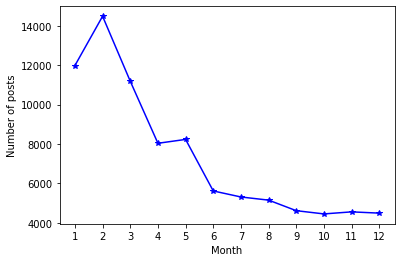

每月发帖数量为： [11981, 14481, 11186, 8039, 8235, 5621, 5316, 5156, 4621, 4457, 4561, 4497]


In [7]:
#可视化每月发帖数量；

x = [i[0] for i in topic_time_dict_sorted]
y = [i[1] for i in topic_time_dict_sorted]

x_ = tuple([str(i) for i in x])

plt.plot(x, y, 'b*-')
plt.xticks(x, x_)
plt.yticks(fontsize=10)
plt.xlabel('Month')
plt.ylabel('Number of posts', fontsize=10)
#plt.legend()

plt.savefig(r'1.png', dpi=1000)

plt.show()

print('每月发帖数量为：', y)

### 计算每天发帖数量；

In [8]:
#计算哪天发帖最多；

topic_time_day = ['.'.join(i.split('/')[1:]) for i in topicUrl_time_filter_dict.values()]
topic_time_day_dict = dict(Counter(topic_time_day))
topic_time_day_dict_sorted = sorted([[i, j] for i, j in topic_time_day_dict.items()], key=lambda x:x[1], reverse=True)

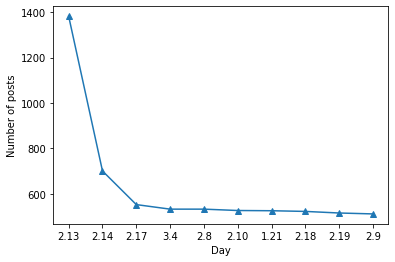

以天为粒度，发帖前数量为： [1382, 701, 553, 533, 533, 527, 526, 523, 516, 512]


In [9]:
#可视化每天发帖数量（前10）；

x = [i[0] for i in topic_time_day_dict_sorted[:10]]
y = [i[1] for i in topic_time_day_dict_sorted[:10]]

x_ = tuple([str(i) for i in x])

plt.plot(x, y, '^-')
plt.xticks(x, x_)
plt.yticks(fontsize=10)
plt.xlabel('Day')
plt.ylabel('Number of posts', fontsize=10)
#plt.legend()

plt.savefig(r'2.png', dpi=1000)

plt.show()

print('以天为粒度，发帖前数量为：', y)

### 计算用户发帖数量分布；

In [139]:
id_url = csv.id
topic_id = [[u, i] for i, u in zip(id_url, topic_url)]
topic_id_filter = [i for i in topic_id if str(i[0]).split(':')[0] == 'https']
id_topic_filter_dict = dict(topic_id_filter)
id_filter = sorted([[i, j]for i, j in dict(Counter(list(id_topic_filter_dict.values()))).items()], key=lambda x:x[1], reverse=True)

print('发帖数量前10的哈er：')
for i in id_filter[:100]:
    print(i)

发帖数量前10的哈er：
['https://www.douban.com/people/Andgler/', 369]
['https://www.douban.com/people/deadgirlheart/', 170]
['https://www.douban.com/people/189485365/', 108]
['https://www.douban.com/people/173809773/', 86]
['https://www.douban.com/people/202154409/', 79]
['https://www.douban.com/people/newbilitydesign/', 72]
['https://www.douban.com/people/204261982/', 67]
['https://www.douban.com/people/42005461/', 67]
['https://www.douban.com/people/181386398/', 56]
['https://www.douban.com/people/198466470/', 49]
['https://www.douban.com/people/182099823/', 48]
['https://www.douban.com/people/154780616/', 46]
['https://www.douban.com/people/147578437/', 46]
['https://www.douban.com/people/187376814/', 39]
['https://www.douban.com/people/28067388/', 39]
['https://www.douban.com/people/khloris/', 38]
['https://www.douban.com/people/192083075/', 38]
['https://www.douban.com/people/72731630/', 38]
['https://www.douban.com/people/216570977/', 38]
['https://www.douban.com/people/160860499/', 37]
[

In [146]:
print('共有', len(id_filter), '位用户发帖')

共有 46922 位用户发帖


### 计算回帖用户数量分布及最赞回复用户数量；

In [18]:
reply_id = list(csv.reply_id)
topic_replyId= [[j, i] for i, j in zip(reply_id, topic_url)]
topic_replyId_dict = dict([i for i in topic_replyId if str(i[0]).split(':')[0] == 'https'])

topic_replyId_ = []
for key, value in topic_replyId_dict.items():
    v_re = re.split(r'["\']', value)
    v_re_ = []
    for v in v_re:
        if v not in ['[', ', ', ']', '[]']:
            v_re_.append(v)
    topic_replyId_.append([key, v_re_])

popular_idx = list(csv.popular_index)
topic_popularIdx = [[j, i] for i, j in zip(popular_idx, topic_url)]
topic_popularIdx_dict = dict([i for i in topic_popularIdx if str(i[0]).split(':')[0] == 'https'])

topic_replyIdList_dict = dict(topic_replyId_)

replyIdPopuAll_list = []
replyIdAll_list = []
for k, v in topic_popularIdx_dict.items():
    try:
        replyIdPopu_list = topic_replyIdList_dict[k][:int(v)]
        replyId_list = topic_replyIdList_dict[k][int(v):]
    except:
        continue
    replyIdPopuAll_list.append(replyIdPopu_list)
    replyIdAll_list.append(replyId_list)
    
replyIdPopuAll_list_ = sorted([[i, j] for i, j in dict(Counter([j for i in replyIdPopuAll_list for j in i])).items()], key=lambda x:x[1], reverse=True)
replyIdAll_list_ = sorted([[i, j] for i, j in dict(Counter([j for i in replyIdAll_list for j in i])).items()], key=lambda x:x[1], reverse=True)

print('最赞回复前20的哈er：')
for i in replyIdPopuAll_list_[:20]:
    print(i)

最赞回复前20的哈er：
['https://www.douban.com/people/168329724/', 4428]
['https://www.douban.com/people/220599391/', 2972]
['https://www.douban.com/people/deadgirlheart/', 665]
['https://www.douban.com/people/63850076/', 476]
['https://www.douban.com/people/70132522/', 426]
['https://www.douban.com/people/77016718/', 362]
['https://www.douban.com/people/130879171/', 308]
['https://www.douban.com/people/142225631/', 304]
['https://www.douban.com/people/ppzj0531/', 295]
['https://www.douban.com/people/161624149/', 272]
['https://www.douban.com/people/yoma/', 252]
['https://www.douban.com/people/148561478/', 243]
['https://www.douban.com/people/133570836/', 234]
['https://www.douban.com/people/moshushi1123/', 221]
['https://www.douban.com/people/tiepido/', 206]
['https://www.douban.com/people/104411721/', 199]
['https://www.douban.com/people/168578270/', 194]
['https://www.douban.com/people/182299213/', 187]
['https://www.douban.com/people/188740426/', 178]
['https://www.douban.com/people/guopeng

In [82]:
print('回复数量前20的哈er：')
for i in replyIdAll_list_[:20]:
    print(i)

回复数量前20的哈er：
['https://www.douban.com/people/168329724/', 9256]
['https://www.douban.com/people/220599391/', 6261]
['https://www.douban.com/people/70132522/', 4332]
['https://www.douban.com/people/deadgirlheart/', 3365]
['https://www.douban.com/people/ppzj0531/', 2603]
['https://www.douban.com/people/130879171/', 2297]
['https://www.douban.com/people/161624149/', 2172]
['https://www.douban.com/people/143047320/', 1744]
['https://www.douban.com/people/152288544/', 1633]
['https://www.douban.com/people/29112941/', 1585]
['https://www.douban.com/people/148561478/', 1581]
['https://www.douban.com/people/67876697/', 1508]
['https://www.douban.com/people/198059162/', 1436]
['https://www.douban.com/people/193996802/', 1416]
['https://www.douban.com/people/168578270/', 1340]
['https://www.douban.com/people/LISTCHAINHASH/', 1324]
['https://www.douban.com/people/142225631/', 1310]
['https://www.douban.com/people/82986120/', 1267]
['https://www.douban.com/people/63850076/', 1259]
['https://www.do

### 计算帖子回应数量分布；

In [20]:
responses_num = list(csv.responses_num)
topic_responseNum = [[j, i] for i, j in zip(responses_num, topic_url)]
topic_responseNum_dict = dict([i for i in topic_responseNum if str(i[0]).split(':')[0] == 'https'])

topic_replyIdNums_dict = dict([[i[0], len(i[1])] for i in topic_replyId_])

topic_responseNum_dict_ = []
for i, j in topic_responseNum_dict.items():
    try:
        j = int(j)
        topic_responseNum_dict_.append([i, j])
    except:
        continue

topic_responseNum_sorted = sorted([[i, j] for i, j in dict(topic_responseNum_dict_).items()], key=lambda x:x[1], reverse=True)
topic_responseNum_filter = [[i[0], i[1]] for i in topic_responseNum_sorted if topic_replyIdNums_dict[i[0]] > 2]

print('回复数量前17的帖子：')
for i in topic_responseNum_filter[:20]:
    print(i)

回复数量前17的帖子：
['https://www.douban.com/group/topic/169984229/', 12830]
['https://www.douban.com/group/topic/169590220/', 4774]
['https://www.douban.com/group/topic/170122342/', 4551]
['https://www.douban.com/group/topic/170095963/', 4409]
['https://www.douban.com/group/topic/165572383/', 4234]
['https://www.douban.com/group/topic/168024203/', 4107]
['https://www.douban.com/group/topic/163936115/', 3920]
['https://www.douban.com/group/topic/164475894/', 3322]
['https://www.douban.com/group/topic/167919155/', 3125]
['https://www.douban.com/group/topic/164221169/', 3066]
['https://www.douban.com/group/topic/162217203/', 2888]
['https://www.douban.com/group/topic/179313888/', 2868]
['https://www.douban.com/group/topic/168816892/', 2868]
['https://www.douban.com/group/topic/159179545/', 2759]
['https://www.douban.com/group/topic/168963873/', 2746]
['https://www.douban.com/group/topic/174873141/', 2690]
['https://www.douban.com/group/topic/164445477/', 2623]
['https://www.douban.com/group/topi

In [22]:
top2000 = len([i[0] for i in topic_responseNum_sorted if i[1] >= 2000])
top2000_1500 = len([i[0] for i in topic_responseNum_sorted if 1500 <= i[1] < 2000])
top1500_1000 = len([i[0] for i in topic_responseNum_sorted if 1000 <= i[1] < 1500])
top1000_500 = len([i[0] for i in topic_responseNum_sorted if 500 <= i[1] < 1000])
top500_0 = len([i[0] for i in topic_responseNum_sorted if i[1] < 500])

In [23]:
top500_400 = len([i[0] for i in topic_responseNum_sorted if 400 <= i[1] < 500])
top400_300 = len([i[0] for i in topic_responseNum_sorted if 300 <= i[1] < 400])
top300_200 = len([i[0] for i in topic_responseNum_sorted if 200 <= i[1] < 300])
top200_100 = len([i[0] for i in topic_responseNum_sorted if 100 <= i[1] < 300])
top100_0 = len([i[0] for i in topic_responseNum_sorted if 0 <= i[1] < 100])
topMax100 = len([i[0] for i in topic_responseNum_sorted if i[1] > 100])

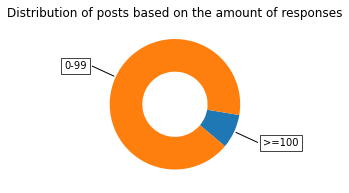

In [59]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

recipe = ['>=100', '0-99']

data = [topMax100, top100_0]
#data_ = [top500_400, top400_300, top300_200, top200_100, top100_0]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title('Distribution of posts based on the amount of responses')

plt.savefig(r'4.png', dpi=1000)

plt.show()

### 计算哈er的发帖方式及回帖方式；

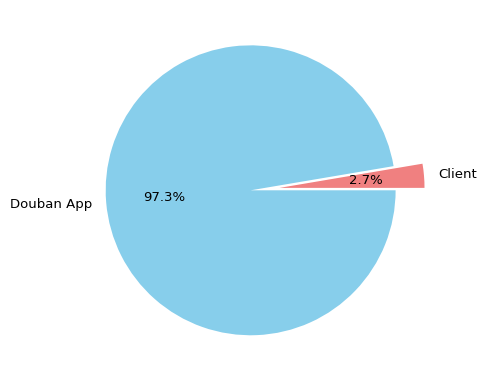

In [58]:
topic_ways = list(csv.topic_ways)
topic_topicWays = [[j, i] for i, j in zip(topic_ways, topic_url)]
topic_responseNum_dict = dict([i for i in topic_topicWays if str(i[0]).split(':')[0] == 'https'])

appWay = [j for i, j in topic_responseNum_dict.items() if j == '来自 豆瓣App']

my_dpi=95
plt.figure(figsize=(480/my_dpi,480/my_dpi),dpi=my_dpi)
plt.pie(x=[2351, 85800],
        labels=['Client', 'Douban App'],
        colors=["#F08080", "#87CEEB"],
        autopct='%1.1f%%',
        explode=(0.2, 0),
       )
plt.savefig(r'3.png', dpi=1000)
plt.show()

In [35]:
reply_ways = list(csv.replyWays)
topic_replyWays = [[j, i] for i, j in zip(reply_ways, topic_url)]
topic_replyWays_dict = dict([i for i in topic_replyWays if str(i[0]).split(':')[0] == 'https'])

topic_replyWays_list = []

for k, v in topic_replyWays_dict.items():
    try:
        #v_re = re.split(r'["\']', v)
        v_re = [i for i in re.split(r'["\']', v) if i not in ['[', ', ', ']', '[]']]
        topic_replyWays_list.append([k, v_re])
    except:
        continue

replyWays_list = [j for i in topic_replyWays_list for j in i[1]]
Counter(replyWays_list)

Counter({'': 216712, '来自 豆瓣App': 2102586})

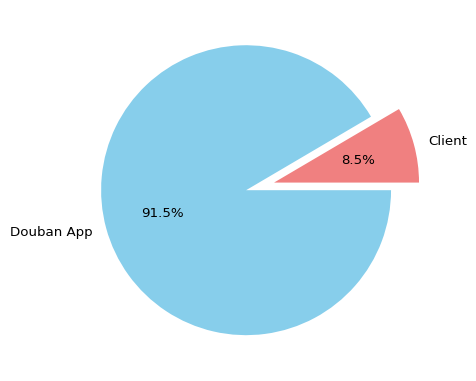

In [60]:
data_ = [dict(Counter(replyWays_list))[''], dict(Counter(replyWays_list))['来自 豆瓣App']]

my_dpi=96
plt.figure(figsize=(480/my_dpi,480/my_dpi),dpi=my_dpi)
plt.pie(x=data,
        labels=['Client', 'Douban App'],
        colors=["#F08080", "#87CEEB"],
        autopct='%1.1f%%',
        explode=(0.2, 0),#某部分突出显示，值越大，距离中心越远，该法可解决饼图字体重叠的问题
       )
plt.savefig(r'5.png', dpi=1000)
plt.show()

### 词云图；

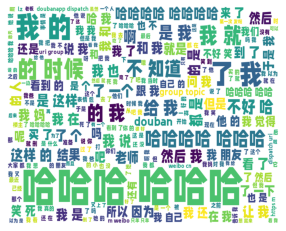

In [81]:
docs = list(csv.docs)
topic_docs = [[j, i] for i, j in zip(docs, topic_url)]
topic_docs_dict = dict([i for i in topic_docs if str(i[0]).split(':')[0] == 'https'])

words = []
for i in topic_docs_dict.values():
    try:
        word_list = list(jieba.cut(i))
    except:
        continue
    words.extend(word_list)

words_s = ' '.join(words)
 
wc = WordCloud(font_path=r'ZiZhiQuXiMaiTi-2.ttf',
               background_color='white',
               width=1000,
               height=800,
               ).generate(words_s)
#wc.to_file('hahaha.png')
plt.imshow(wc)
plt.axis('off')
plt.show()

### 回复内容分析；

In [179]:
reply_content = list(csv.reply_content)

topic_replyContent= [[j, i] for i, j in zip(reply_content, topic_url)]
topic_replyContent_dict = dict([i for i in topic_replyContent if str(i[0]).split(':')[0] == 'https'])

In [185]:
topic_replyContent_ = []
for key, value in topic_replyContent_dict.items():
    try:
        v_rc = re.split(r'["\']', value)
        v_rc_ = []
        for v in v_rc:
            if v not in ['[', ', ', ']', '[]']:
                v_rc_.append(v)
    except:
        v_rc_ = []
    topic_replyContent_.append([key, v_rc_])

topic_replyContent_filter_dict = dict(topic_replyContent_)

replyContent_all = []
for k, v in topic_popularIdx_dict.items():
    try:
        r_c = topic_replyContent_filter_dict[k][int(v):]
        replyContent_all.append(r_c)
    except:
        continue
        
replyContent_all_ = [j for i in replyContent_all for j in i]

In [205]:
reply_ha = [j for i in replyContent_all_ for j in i]
reply_ha.count('哈')

13582033

In [206]:
replyContent_all_idx = []
for k, v in topic_popularIdx_dict.items():
    try:
        r_c = topic_replyContent_filter_dict[k][int(v):]
        replyContent_all_idx.append([k, r_c])
    except:
        continue

In [218]:
url_haNum = []
for i in replyContent_all_idx:
    try:
        chs = []
        for j in i[1]:
            ch = [m for m in j].count('哈')
            chs.append(ch)
        url_haNum.append([i[0], max(chs)])
    except:
        url_haNum.append([i[0], 0])

In [226]:
sorted(url_haNum, key=lambda x:x[1], reverse=True)

[['https://www.douban.com/group/topic/177299741/', 5000],
 ['https://www.douban.com/group/topic/177285381/', 5000],
 ['https://www.douban.com/group/topic/177279365/', 5000],
 ['https://www.douban.com/group/topic/177298018/', 5000],
 ['https://www.douban.com/group/topic/153537738/', 4354],
 ['https://www.douban.com/group/topic/169438490/', 4254],
 ['https://www.douban.com/group/topic/202344557/', 4080],
 ['https://www.douban.com/group/topic/163520267/', 3591],
 ['https://www.douban.com/group/topic/171448062/', 3584],
 ['https://www.douban.com/group/topic/183433796/', 3528],
 ['https://www.douban.com/group/topic/171155922/', 3136],
 ['https://www.douban.com/group/topic/154166359/', 2585],
 ['https://www.douban.com/group/topic/173738546/', 2520],
 ['https://www.douban.com/group/topic/166602052/', 2056],
 ['https://www.douban.com/group/topic/188743142/', 2000],
 ['https://www.douban.com/group/topic/180601539/', 2000],
 ['https://www.douban.com/group/topic/179415360/', 2000],
 ['https://www